In [130]:
import pandas as pd

In [131]:
df = pd.read_csv('Data V3.csv')
df.head()

,name,duration,rating,review,sentiment
0,dalal Alsharqawi,an hour ago,5,(Translated by Google) A beautiful restaurant ...,Positive
1,noor jbara,2 hours ago,5,A little overpriced but delicious pizza,Positive
2,محمد الشعيلي,4 hours ago,5,(Translated by Google) Very beautiful 🤩 deserv...,Positive
3,SMILE DAYS,7 hours ago,5,(Translated by Google) There is a response to ...,Positive
4,M H,8 hours ago,5,(Translated by Google) The best pizza in the w...,Positive


In [132]:
import re

def remove_emojis(text):
  #print(text) # with emoji
  emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

In [133]:
import re
import emoji
import nltk # for processing texts
from nltk.corpus import stopwords # list of stop words
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Remove emoji
    #text = remove_emojis(text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    
    #text = ' '.join([word for word in text.split() if word not in stopwords.words("english")]) # remove stop word
    return text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aziz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aziz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aziz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [134]:
df['review'] = df['review'].apply(clean_text)

In [135]:
df['review'][4]

'translated by google the best pizza in the whole east original '

In [136]:
df['review'] = df['review'].str.replace('translated by google ', '')
df['review'] = df['review'].str.replace(' original ', '')

In [137]:
df['review'][4]

'the best pizza in the whole east'

In [140]:
# counts of missing values in dataset 
df.isna().sum()

name         0
duration     0
rating       0
review       0
sentiment    0
dtype: int64

In [139]:
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=['name'],
    inplace=True
)

In [141]:
df.to_csv('Data Visualization.csv',index=False, encoding='utf-8-sig')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

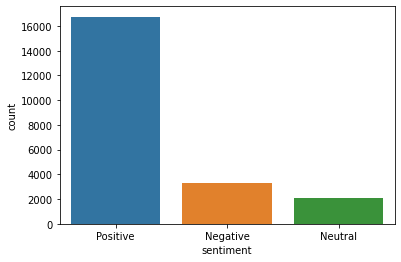

In [83]:
import seaborn as sns

sns.countplot(df['sentiment'])

# Model

In [84]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # for reading csv file
import numpy as np
import re # for preprocessing text
import string # for preprocessing text
from sklearn.feature_extraction.text import CountVectorizer # to create Bag of words
from sklearn.model_selection import train_test_split  # for splitting data
from sklearn.naive_bayes import GaussianNB # to build classifier model
from sklearn.preprocessing import LabelEncoder # to convert classes to number 
from sklearn.metrics import accuracy_score # to calculate accuracy
import nltk # for processing texts
from nltk.corpus import stopwords # list of stop words
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aziz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aziz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aziz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [89]:
max_features = 1500
count_vector = CountVectorizer(max_features = max_features)  
X = count_vector.fit_transform(df['review']).toarray() 
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [90]:
print("most using {} words: {} ".format(max_features, count_vector.get_feature_names_out()))

most using 1500 words: ['abdullah' 'able' 'absolutely' ... 'yusra' 'zain' 'zero'] 


In [91]:
print(count_vector.vocabulary_)

{'beautiful': 109, 'restaurant': 1082, 'staff': 1245, 'original': 886, 'little': 697, 'overpriced': 896, 'delicious': 304, 'pizza': 942, 'deserves': 312, 'stars': 1252, 'response': 1080, 'owner': 898, 'regarding': 1051, 'prayer': 974, 'time': 1346, 'liked': 692, 'visit': 1413, 'best': 120, 'whole': 1453, 'east': 356, 'honestly': 576, 'nice': 838, 'dealing': 292, 'since': 1190, 'days': 289, 'previous': 988, 'small': 1204, 'branch': 141, 'tasty': 1315, 'meat': 771, 'pepperoni': 922, 'shish': 1175, 'tawook': 1316, 'one': 866, 'person': 929, 'wish': 1461, 'success': 1273, 'deserve': 311, 'five': 469, 'owners': 899, 'style': 1272, 'especially': 389, 'restaurants': 1083, 'god': 522, 'bless': 133, 'tasted': 1308, 'food': 478, 'jeddah': 635, 'give': 515, 'stomach': 1260, 'negative': 831, 'star': 1251, 'naimi': 818, 'something': 1215, 'fancy': 438, 'advise': 16, 'order': 879, 'comes': 229, 'reach': 1030, 'portions': 967, 'stop': 1261, 'spicy': 1238, 'egg': 365, 'sauce': 1132, 'goes': 523, 'well

In [92]:
d = pd.DataFrame(X,columns=count_vector.get_feature_names_out())
d

,abdullah,able,absolutely,abu,accept,acceptable,accommodating,according,account,actually,...,yet,young,youre,yousra,youth,yum,yummy,yusra,zain,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# convert classes to number
encoder = LabelEncoder()
y = encoder.fit_transform(df['sentiment'])
y

array([2, 2, 2, ..., 1, 2, 1])

In [94]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

In [95]:
import sklearn 
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import random

# Logistic Regression

In [96]:
logistic = LogisticRegression()
print(logistic.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [97]:
# make pipeline
model = LogisticRegression()
# make param grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# create and fit the model
model = GridSearchCV(logistic, param_grid, cv=10, n_jobs=-1)
model.fit(X_train,y_train)

# make prediction and print accuracy
prediction = model.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test, prediction):.2f}")
print(classification_report(y_test, prediction))

Accuracy score is 0.83
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       655
           1       0.34      0.07      0.12       461
           2       0.85      0.97      0.91      3318

    accuracy                           0.83      4434
   macro avg       0.65      0.55      0.57      4434
weighted avg       0.78      0.83      0.79      4434



In [98]:
# Predicting the Test set results 
y_pred = model.predict(X_test) 
y_pred

array([0, 1, 2, ..., 0, 1, 2])

In [99]:
print('Test model accuracy: ',accuracy_score(y_test, y_pred))

Test model accuracy:  0.8279206134415877
